In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv("Logistic_X_Train.csv").values
X_test = pd.read_csv("Logistic_X_Test.csv").values
Y_train = pd.read_csv("Logistic_Y_train.csv").values
print(X_train.shape,Y_train.shape,X_test.shape)

(3000, 3) (3000, 1) (1000, 3)


In [3]:
#Normalisation
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train-mean)/std
X_test = (X_test-mean)/std

In [4]:
ones = np.ones((X_train.shape[0],1))
X_train = np.hstack((ones,X_train))
print(X_train.shape)

(3000, 4)


In [5]:
one = np.ones((X_test.shape[0],1))
X_test = np.hstack((one,X_test))
print(X_test.shape)

(1000, 4)


In [6]:
Y_train.reshape((-1,))

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [12]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))

def error(X,Y,theta):
    h = hypothesis(X,theta)
    error = -1*np.mean((Y*np.log(h)+(1-Y)*np.log(1-h)))
    return error/X.shape[0]

def gradient(X,Y,theta):
    h = hypothesis(X,theta)
    grad = np.dot(X.T,(Y-h))
    return grad/X.shape[0]

def gradientDescent(X,Y,lr=0.5,max_itr=500):
    theta = np.zeros((X.shape[1],1))
    error_list = []
    
    for i in range(max_itr):
        e = error(X,Y,theta)
        error_list.append(e)
        
        grad = gradient(X,Y,theta)
        
        theta = theta + lr*grad
    
    return theta,error_list

In [13]:
theta,error_list = gradientDescent(X_train,Y_train)
print(theta)

[[-0.83262325]
 [-4.07340528]
 [ 2.48502446]
 [-2.85683045]]


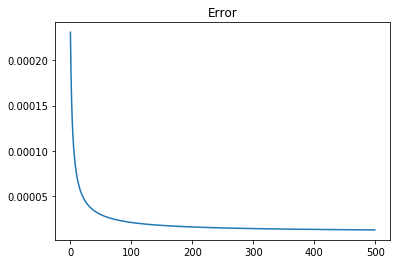

In [14]:
plt.plot(error_list)
plt.title("Error")
plt.show()

In [15]:
def predict(X,theta):
    h = hypothesis(X,theta)
    output = np.zeros((X.shape[0],1))
    output[h>=0.5] = 1
    
    return output

In [17]:
pred_train = predict(X_train,theta)
pred_test = predict(X_test,theta)

In [18]:
def accurate(actual,prediction):
    actual = actual.astype('int')
    actual = actual.reshape((-1,1))
    
    acc = np.sum(actual==prediction)/actual.shape[0]
    
    return acc

In [19]:
accurate(Y_train,pred_train)

0.9946666666666667

In [20]:
df = pd.DataFrame(pred_test,columns=["label"])
df.to_csv("predict.csv",index = False)